In [3]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 kB 1.8 MB/s eta 0:00:0000:0100:01


In [1]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
from script.transformer_timestep import *

2023-02-15 10:03:09.740972: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Tensorflow version: 2.5.0


2023-02-15 10:03:23.035620: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-02-15 10:03:23.110085: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:21:00.0 name: NVIDIA Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.46GiB deviceMemoryBandwidth: 625.94GiB/s
2023-02-15 10:03:23.110248: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-02-15 10:03:23.280534: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-02-15 10:03:23.280796: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-02-15 10:03:23.338360: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuff

In [14]:
# BTC_df = pd.read_excel('./data/BTC_multi_factor.xlsx')
# del BTC_df['time']
# del BTC_df['symbol']
# del BTC_df['下週期幣種漲跌幅']



# # 
# muliti_factor_min_max_parameter = {}

# BTC_df.dropna(how='any', axis=0, inplace=True)
# times = sorted(BTC_df.index.values)
# last_10pct = sorted(BTC_df.index.values)[-int(0.1*len(times))] # Last 10% of series
# last_20pct = sorted(BTC_df.index.values)[-int(0.2*len(times))] # Last 20% of series

# BTC_df[['open', 'high', 'low', 'close','volume','taker_buy_base_asset_volume','taker_buy_quote_asset_volume']] = BTC_df[['open', 'high', 'low', 'close','volume','taker_buy_base_asset_volume','taker_buy_quote_asset_volume']].rolling(10).mean()
# BTC_df['open']   = BTC_df['open'].pct_change() # Create arithmetic returns column
# BTC_df['high']   = BTC_df['high'].pct_change() # Create arithmetic returns column
# BTC_df['low']    = BTC_df['low'].pct_change() # Create arithmetic returns column
# BTC_df['close']  = BTC_df['close'].pct_change() # Create arithmetic returns column
# BTC_df['volume'] = BTC_df['volume'].pct_change()
# BTC_df['taker_buy_base_asset_volume']  = BTC_df['taker_buy_base_asset_volume'].pct_change()
# BTC_df['taker_buy_quote_asset_volume'] = BTC_df['taker_buy_quote_asset_volume'].pct_change()

# BTC_df.dropna(how='any', axis=0, inplace=True)
# # min_max
# multi_min_return = min(BTC_df[(BTC_df.index < last_10pct)][['open', 'high', 'low', 'close']].min(axis=0))
# multi_max_return = max(BTC_df[(BTC_df.index < last_10pct)][['open', 'high', 'low', 'close']].max(axis=0))
# muliti_factor_min_max_parameter['multi_min_return'] = multi_min_return
# muliti_factor_min_max_parameter['multi_max_return'] = multi_max_return

# # # Min-max volume column
# vol_min_return = min(BTC_df[(BTC_df.index < last_10pct)][['volume']].min(axis=0))
# vol_max_return = max(BTC_df[(BTC_df.index < last_10pct)][['volume']].max(axis=0))
# muliti_factor_min_max_parameter['vol_max_return'] = vol_max_return
# muliti_factor_min_max_parameter['vol_min_return'] = vol_min_return
# # # Min-max quote_volume column
# quote_volume_min_return = min(BTC_df[(BTC_df.index < last_10pct)][['quote_volume']].min(axis=0))
# quote_volume_max_return = max(BTC_df[(BTC_df.index < last_10pct)][['quote_volume']].max(axis=0))
# muliti_factor_min_max_parameter['quote_volume_min_return'] = quote_volume_min_return
# muliti_factor_min_max_parameter['quote_volume_max_return'] = quote_volume_max_return

# # # # Min-max taker_buy_base_asset_volume column
# taker_buy_base_asset_volume_min_return = min(BTC_df[(BTC_df.index < last_10pct)][['taker_buy_base_asset_volume']].min(axis=0))
# taker_buy_base_asset_volume_max_return = max(BTC_df[(BTC_df.index < last_10pct)][['taker_buy_base_asset_volume']].max(axis=0))
# muliti_factor_min_max_parameter['taker_buy_base_asset_volume_max_return'] = taker_buy_base_asset_volume_max_return
# muliti_factor_min_max_parameter['taker_buy_base_asset_volume_min_return'] = taker_buy_base_asset_volume_min_return
# # # # Min-max taker_buy_quote_asset_volume column
# taker_buy_quote_asset_volume_min_return = min(BTC_df[(BTC_df.index < last_10pct)][['taker_buy_quote_asset_volume']].min(axis=0))
# taker_buy_quote_asset_volume_max_return = max(BTC_df[(BTC_df.index < last_10pct)][['taker_buy_quote_asset_volume']].max(axis=0))
# muliti_factor_min_max_parameter['taker_buy_quote_asset_volume_min_return'] = taker_buy_quote_asset_volume_min_return
# muliti_factor_min_max_parameter['taker_buy_quote_asset_volume_max_return'] = taker_buy_quote_asset_volume_max_return
# # # # Min-max trade_num column
# trade_num_min_return = min(BTC_df[(BTC_df.index < last_10pct)][['trade_num']].min(axis=0))
# trade_num_max_return = max(BTC_df[(BTC_df.index < last_10pct)][['trade_num']].max(axis=0))
# muliti_factor_min_max_parameter['trade_num_min_return'] = trade_num_min_return
# muliti_factor_min_max_parameter['trade_num_max_return'] = trade_num_max_return


In [4]:
df = pd.read_excel('./data/BTC_multi_factor.xlsx')
df_normalized = df_mulit_factor_nomalization(df)

In [5]:
times = sorted(df_normalized.index.values)
last_10pct = sorted(df_normalized.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df_normalized.index.values)[-int(0.2*len(times))] # Last 20% of series
df_train = df_normalized[(df_normalized.index < last_10pct)]  # Training data are 80% of total data
df_val   = df_normalized[(df_normalized.index >= last_20pct) & (df_normalized.index < last_10pct)]
df_test  = df_normalized[(df_normalized.index >= last_10pct)]

In [6]:
df_normalized.shape[0]

3315

In [7]:
predicted_train = multi_facter_transformer_prediction_model(df_train, (df_train.shape[0]-128))
predicted_val   = multi_facter_transformer_prediction_model(df_val, (df_val.shape[0]-128))
predicted_test  = multi_facter_transformer_prediction_model(df_test, (df_test.shape[0]-128))
predicted_test.to_pickle('./output_file/predicted_testing.pickle')

2023-02-15 10:05:03.706024: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-15 10:05:03.750030: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz
2023-02-15 10:05:09.129814: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-02-15 10:05:13.875447: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-02-15 10:05:14.382114: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-02-15 10:05:19.472898: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8200


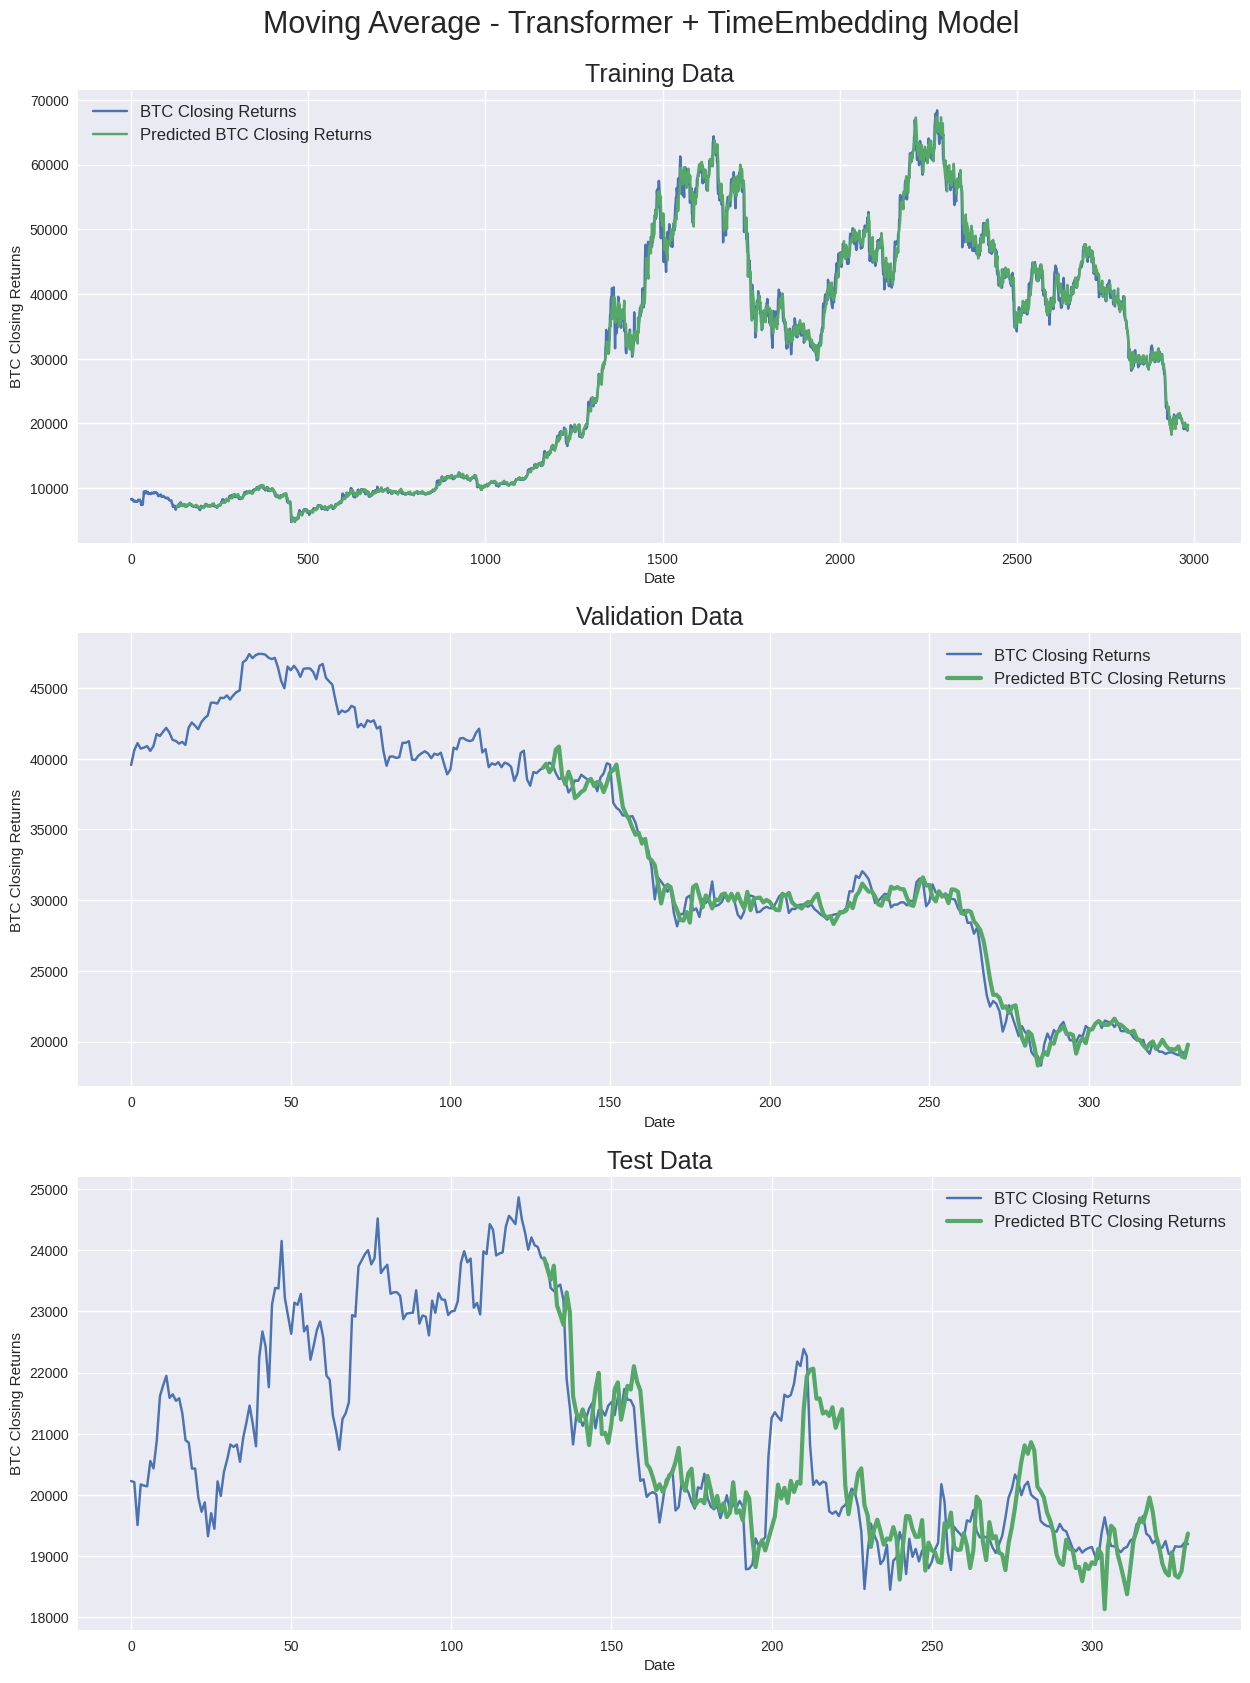

In [8]:

#'''Display results'''
seq_len = 128
fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Moving Average - Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(predicted_train['close_original'], label='BTC Closing Returns')
ax11.plot(np.arange(seq_len+1, predicted_train.shape[0]), predicted_train['pred_close'][129:], label='Predicted BTC Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('BTC Closing Returns')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(predicted_val['close_original'], label='BTC Closing Returns')
ax21.plot(np.arange(seq_len+1, predicted_val.shape[0]), predicted_val['pred_close'][129:], linewidth=3, label='Predicted BTC Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('BTC Closing Returns')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(predicted_test['close_original'], label='BTC Closing Returns')
ax31.plot(np.arange(seq_len+1, predicted_test.shape[0]), predicted_test['pred_close'][129:], linewidth=3, label='Predicted BTC Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('BTC Closing Returns')
ax31.legend(loc="best", fontsize=12)

In [2]:
# df = pd.read_csv('./data/BTC-USD_1111.csv',sep=',')
# normalized_df = df_normalization(df)
# close_price, next_day_input_df= transformer_prediction_model(normalized_df,1)
# close_price

2022-11-11 12:39:25.677772: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-11 12:39:25.678699: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz
2022-11-11 12:39:30.639901: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-11-11 12:39:31.423450: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-11-11 12:39:31.439394: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-11-11 12:39:32.153501: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8200


17420.468989156216